In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from plotnine import *

In [2]:
dataRN = pd.read_csv('C:/Users/JCfor/Desktop/Proyecto Tesis I/DatasetFinal.csv')
##Variable valor de traspaso
valor = dataRN['Valor de traspaso'].str.split('-',expand = True)
valor.columns = ['MenorV', 'V_traspaso']
dataRN = pd.concat( [ dataRN,valor.V_traspaso ] , axis= 1)

##Variable Sueldo
dataRN['Sueldo'] = dataRN['Sueldo'].str.extract('(\d+)', 
                                                    expand=False).astype(float)
dataRN['Sueldo'] = dataRN['Sueldo']*1000

#Cambio nombre de posición
dataRN = dataRN.replace(to_replace ='CR.*', value = 'MC', regex = True)
dataRN = dataRN.replace(to_replace ='DF.*', value = 'DF', regex = True)
dataRN = dataRN.replace(to_replace ='DL.*', value = 'DL', regex = True)
dataRN = dataRN.replace(to_replace ='MC.*', value = 'MC', regex = True)
dataRN = dataRN.replace(to_replace ='MP.*', value = 'MP', regex = True)
dataRN = dataRN.replace(to_replace ='ME.*', value = 'MP', regex = True)

In [17]:
position = dataRN.Posición.tolist()
names = dataRN.Nombre.tolist()

In [4]:
#Eliminación de columnas
data = dataRN.drop( ['Inf', 'Source.Name', 'Rec', 'Nombre', 'Club', 'División', 'Posición',
 'Edad', 'Sueldo', 'V_traspaso','Valor de traspaso' ], axis=1)

In [5]:
data.head()

,Valoracion,Vis,Vel,Val,1v1,Lib,Lej,Téc,Tal,Ser,...,Col,Cen,Cab,Blo,Ant,Sal.1,Aér,Agr,Agi,Ace
0,30,13,11,2,1,6,4,10,8,13,...,3,8,3,3,8,6,3,8,11,13
1,24,7,12,8,3,1,6,6,5,7,...,8,4,5,4,5,3,1,9,11,14
2,18,7,13,7,4,1,2,8,5,4,...,5,4,7,1,8,2,2,15,13,15
3,25,3,8,7,3,1,3,5,5,4,...,12,2,5,2,7,14,3,12,8,7
4,22,2,9,7,1,1,1,5,5,3,...,12,2,12,2,5,8,1,7,9,11


In [6]:
x_RN = np.asanyarray(data.drop(columns=['Valoracion']))
y_RN=data['Valoracion']

print(x_RN.shape)
print(y_RN.shape)

(3191, 47)
(3191,)


In [7]:
#Transformar data a media 0
scaler = preprocessing.StandardScaler()
scaler.fit(x_RN)
x_scaled = scaler.transform(x_RN)

In [8]:
#Aplicando PCA
pca = PCA(n_components=2) 
principalComp = pca.fit_transform(x_scaled)

In [9]:
def crear_modelo():
    modeloRN = keras.Sequential([
        keras.layers.Dense(6, activation='sigmoid', input_shape=(2,)),
        keras.layers.Dense(1)
    ])

    sgd = tf.keras.optimizers.SGD(learning_rate=0.001,
    momentum=0.1)

    modeloRN.compile(optimizer = sgd,
                loss='mse',
                metrics=['mae'])
    return modeloRN

In [10]:
from keras.wrappers.scikit_learn import KerasRegressor
model = KerasRegressor(build_fn=crear_modelo, epochs=600, batch_size=10)

C:\Users\JCfor\AppData\Local\Temp\ipykernel_20748\3541303909.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


In [11]:
'''
from sklearn.model_selection import ShuffleSplit,cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

shuffle_split=ShuffleSplit(test_size=0.2,train_size=0.6,n_splits=5)
scores=cross_val_score(model,x_RN,Y,scoring='r2',cv=shuffle_split)
'''

"\nfrom sklearn.model_selection import ShuffleSplit,cross_val_score\nfrom sklearn.datasets import load_iris\nfrom sklearn.linear_model import LogisticRegression\n\nshuffle_split=ShuffleSplit(test_size=0.2,train_size=0.6,n_splits=5)\nscores=cross_val_score(model,x_RN,Y,scoring='r2',cv=shuffle_split)\n"

In [12]:
model.fit(principalComp,y_RN)

Epoch 1/600
320/320 [==============================] - 2s 817us/step - loss: 508.2715 - mae: 16.4024
Epoch 2/600
320/320 [==============================] - 0s 697us/step - loss: 68.4164 - mae: 6.3732
Epoch 3/600
320/320 [==============================] - 0s 688us/step - loss: 46.0970 - mae: 5.1090
Epoch 4/600
320/320 [==============================] - 0s 689us/step - loss: 34.0177 - mae: 4.5035
Epoch 5/600
320/320 [==============================] - 0s 634us/step - loss: 31.6170 - mae: 4.3477
Epoch 6/600
320/320 [==============================] - 0s 647us/step - loss: 30.5551 - mae: 4.2830
Epoch 7/600
320/320 [==============================] - 0s 634us/step - loss: 30.0540 - mae: 4.2613
Epoch 8/600
320/320 [==============================] - 0s 658us/step - loss: 29.7686 - mae: 4.2247
Epoch 9/600
320/320 [==============================] - 0s 652us/step - loss: 29.4535 - mae: 4.2046
Epoch 10/600
320/320 [==============================] - 0s 658us/step - loss: 29.3128 - mae: 4.1812
Epoch 1

In [13]:
from sklearn.metrics import r2_score
y_pred = model.predict(principalComp)
print("The R2 score:\t{:0.3f}".format(r2_score(y_RN, y_pred)))

320/320 [==============================] - 0s 536us/step
The R2 score:	0.925


In [19]:
dataRNN = pd.DataFrame(data = principalComp, columns=['PC1','PC2'])
dataRNN['valor'] = y_pred
dataRNN['pos'] = position
dataRNN['names'] = names
dataRNN.tail()

,PC1,PC2,valor,pos,names
3186,-5.708714,0.643837,69.793633,MP,Gianluca Caprari
3187,-4.396784,0.780632,64.036522,MP,Matteo Cancellieri
3188,-4.919350,1.500517,67.278442,DF,Martin Hongla
3189,-4.943170,0.975989,66.595787,DF,Fabio Depaoli
3190,-4.915478,1.531466,67.323669,DF,Mattia De Sciglio


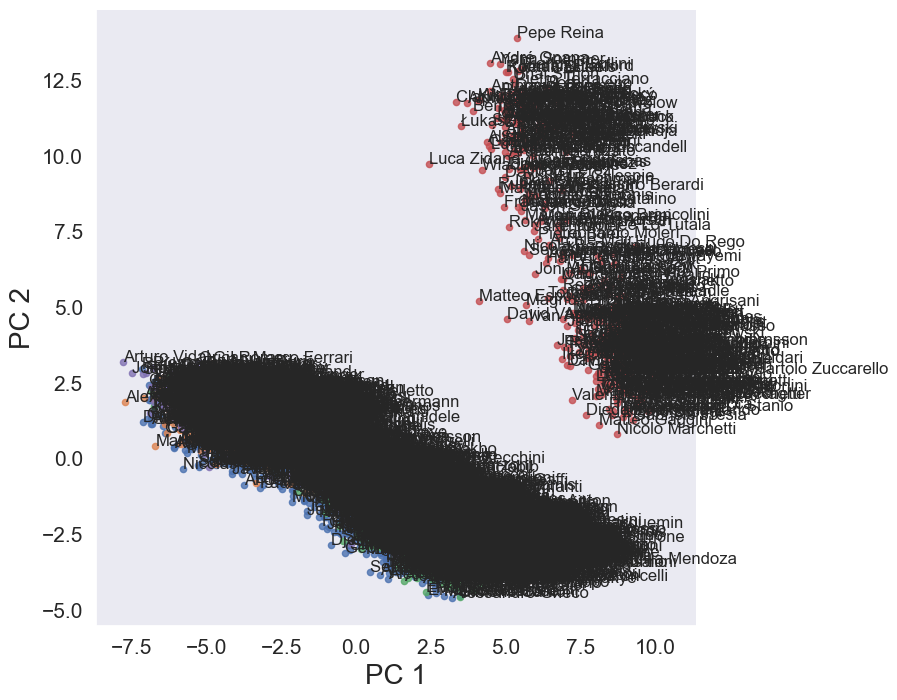

In [22]:
from turtle import width
#(ggplot(DFprincipal, aes(x='PC1', y='PC2', color='y_test_pred'))+geom_point())
sns.set(style="dark")

ax = sns.lmplot(x="PC1",y="PC2",hue= "pos",data = dataRNN, legend=False,
                   fit_reg=False, scatter_kws={"s": 20}, height=7)

#texts = []
#for x, y, s in zip(dataRNN.PC1, dataRNN.PC2, dataRNN.names):
#    texts.append(plt.text(x, y, s))

#ax.set(ylim=(0, 100))
#ax.set(xlim=(0, 100))

plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)

plt.show()